<img src='http://hilpisch.com/tpq_logo.png' width="300px" align="right">

# FPQ Bootcamp &mdash; Day 3

**Financial Data & Data API**

## Financial Data

In [1]:
import numpy as np
import pandas as pd
from pylab import plt
plt.style.use('seaborn')
%matplotlib inline

In [2]:
raw = pd.read_csv('http://hilpisch.com/tr_eikon_eod_data.csv',
                 index_col=0, parse_dates=True)

In [3]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1972 entries, 2010-01-04 to 2017-10-31
Data columns (total 12 columns):
AAPL.O    1972 non-null float64
MSFT.O    1972 non-null float64
INTC.O    1972 non-null float64
AMZN.O    1972 non-null float64
GS.N      1972 non-null float64
SPY       1972 non-null float64
.SPX      1972 non-null float64
.VIX      1972 non-null float64
EUR=      1972 non-null float64
XAU=      1972 non-null float64
GDX       1972 non-null float64
GLD       1972 non-null float64
dtypes: float64(12)
memory usage: 200.3 KB


In [4]:
raw.head()

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
Date,,,,,,,,,,,,
2010-01-04,30.572827,30.950,20.88,133.90,173.08,113.33,1132.99,20.04,1.4411,1120.00,47.71,109.80
2010-01-05,30.625684,30.960,20.87,134.69,176.14,113.63,1136.52,19.35,1.4368,1118.65,48.17,109.70
2010-01-06,30.138541,30.770,20.80,132.25,174.26,113.71,1137.14,19.16,1.4412,1138.50,49.34,111.51
2010-01-07,30.082827,30.452,20.60,130.00,177.67,114.19,1141.69,19.06,1.4318,1131.90,49.10,110.82
2010-01-08,30.282827,30.660,20.83,133.52,174.31,114.57,1144.98,18.13,1.4412,1136.10,49.84,111.37


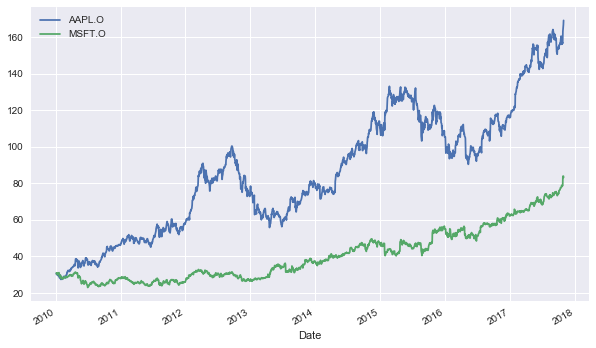

In [5]:
raw[['AAPL.O', 'MSFT.O']].plot(figsize=(10, 6));

## Input-Output

In [6]:
%time raw.to_csv('data.csv')

CPU times: user 69.7 ms, sys: 6.6 ms, total: 76.3 ms
Wall time: 88.6 ms


In [7]:
ls

01_bc_day_03.md          __pycache__/             fxcm_tick_reader.py
02_financial_data.ipynb  data.csv
03_backstesting.ipynb    fin_data_api.py


In [8]:
%time raw.to_excel('data.xlsx')

CPU times: user 1.04 s, sys: 46.4 ms, total: 1.08 s
Wall time: 1.09 s


In [9]:
ls -n data*

-rw-r--r--@ 1 501  20  191772 Nov 23 12:07 data.csv
-rw-r--r--@ 1 501  20  165033 Nov 23 12:07 data.xlsx


In [10]:
%time raw.to_hdf('data.h5', 'raw')

CPU times: user 76 ms, sys: 31.2 ms, total: 107 ms
Wall time: 147 ms


In [11]:
ls -n data*

-rw-r--r--@ 1 501  20  191772 Nov 23 12:07 data.csv
-rw-r--r--  1 501  20  212280 Nov 23 12:07 data.h5
-rw-r--r--@ 1 501  20  165033 Nov 23 12:07 data.xlsx


In [12]:
import sqlite3 as sq3

In [13]:
con = sq3.Connection('data.sql')

In [14]:
raw.to_sql('raw', con)

In [15]:
con.execute('SELECT * FROM raw').fetchmany(2)

[('2010-01-04 00:00:00',
  30.57282657,
  30.95,
  20.88,
  133.9,
  173.08,
  113.33,
  1132.99,
  20.04,
  1.4411,
  1120.0,
  47.71,
  109.8),
 ('2010-01-05 00:00:00',
  30.625683660000004,
  30.96,
  20.87,
  134.69,
  176.14,
  113.63,
  1136.52,
  19.35,
  1.4368,
  1118.65,
  48.17,
  109.7)]

In [16]:
con.execute('SELECT * FROM sqlite_master').fetchall()

[('table',
  'raw',
  'raw',
  2,
  'CREATE TABLE "raw" (\n"Date" TIMESTAMP,\n  "AAPL.O" REAL,\n  "MSFT.O" REAL,\n  "INTC.O" REAL,\n  "AMZN.O" REAL,\n  "GS.N" REAL,\n  "SPY" REAL,\n  ".SPX" REAL,\n  ".VIX" REAL,\n  "EUR=" REAL,\n  "XAU=" REAL,\n  "GDX" REAL,\n  "GLD" REAL\n)'),
 ('index',
  'ix_raw_Date',
  'raw',
  3,
  'CREATE INDEX "ix_raw_Date"ON "raw" ("Date")')]

In [17]:
raw.to_records()[:3]

rec.array([ (datetime.datetime(2010, 1, 4, 0, 0),  30.57282657,  30.95,  20.88,  133.9 ,  173.08,  113.33,  1132.99,  20.04,  1.4411,  1120.  ,  47.71,  109.8 ),
           (datetime.datetime(2010, 1, 5, 0, 0),  30.62568366,  30.96,  20.87,  134.69,  176.14,  113.63,  1136.52,  19.35,  1.4368,  1118.65,  48.17,  109.7 ),
           (datetime.datetime(2010, 1, 6, 0, 0),  30.13854129,  30.77,  20.8 ,  132.25,  174.26,  113.71,  1137.14,  19.16,  1.4412,  1138.5 ,  49.34,  111.51)], 
          dtype=[('Date', 'O'), ('AAPL.O', '<f8'), ('MSFT.O', '<f8'), ('INTC.O', '<f8'), ('AMZN.O', '<f8'), ('GS.N', '<f8'), ('SPY', '<f8'), ('.SPX', '<f8'), ('.VIX', '<f8'), ('EUR=', '<f8'), ('XAU=', '<f8'), ('GDX', '<f8'), ('GLD', '<f8')])

In [18]:
raw.iloc[:5].to_json()

'{"AAPL.O":{"1262563200000":30.57282657,"1262649600000":30.62568366,"1262736000000":30.13854129,"1262822400000":30.08282706,"1262908800000":30.28282686},"MSFT.O":{"1262563200000":30.95,"1262649600000":30.96,"1262736000000":30.77,"1262822400000":30.452,"1262908800000":30.66},"INTC.O":{"1262563200000":20.88,"1262649600000":20.87,"1262736000000":20.8,"1262822400000":20.6,"1262908800000":20.83},"AMZN.O":{"1262563200000":133.9,"1262649600000":134.69,"1262736000000":132.25,"1262822400000":130.0,"1262908800000":133.52},"GS.N":{"1262563200000":173.08,"1262649600000":176.14,"1262736000000":174.26,"1262822400000":177.67,"1262908800000":174.31},"SPY":{"1262563200000":113.33,"1262649600000":113.63,"1262736000000":113.71,"1262822400000":114.19,"1262908800000":114.57},".SPX":{"1262563200000":1132.99,"1262649600000":1136.52,"1262736000000":1137.14,"1262822400000":1141.69,"1262908800000":1144.98},".VIX":{"1262563200000":20.04,"1262649600000":19.35,"1262736000000":19.16,"1262822400000":19.06,"126290880

In [19]:
from_excel = pd.read_excel('data.xlsx', index_col=0)

In [20]:
from_excel.head()

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
Date,,,,,,,,,,,,
2010-01-04,30.572827,30.950,20.88,133.90,173.08,113.33,1132.99,20.04,1.4411,1120.00,47.71,109.80
2010-01-05,30.625684,30.960,20.87,134.69,176.14,113.63,1136.52,19.35,1.4368,1118.65,48.17,109.70
2010-01-06,30.138541,30.770,20.80,132.25,174.26,113.71,1137.14,19.16,1.4412,1138.50,49.34,111.51
2010-01-07,30.082827,30.452,20.60,130.00,177.67,114.19,1141.69,19.06,1.4318,1131.90,49.10,110.82
2010-01-08,30.282827,30.660,20.83,133.52,174.31,114.57,1144.98,18.13,1.4412,1136.10,49.84,111.37


In [21]:
con2 = sq3.Connection('data.sql')

In [22]:
from_sql = pd.read_sql('SELECT * FROM raw', con2)

In [23]:
from_sql.set_index('Date').head()

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
Date,,,,,,,,,,,,
2010-01-04 00:00:00,30.572827,30.950,20.88,133.90,173.08,113.33,1132.99,20.04,1.4411,1120.00,47.71,109.80
2010-01-05 00:00:00,30.625684,30.960,20.87,134.69,176.14,113.63,1136.52,19.35,1.4368,1118.65,48.17,109.70
2010-01-06 00:00:00,30.138541,30.770,20.80,132.25,174.26,113.71,1137.14,19.16,1.4412,1138.50,49.34,111.51
2010-01-07 00:00:00,30.082827,30.452,20.60,130.00,177.67,114.19,1141.69,19.06,1.4318,1131.90,49.10,110.82
2010-01-08 00:00:00,30.282827,30.660,20.83,133.52,174.31,114.57,1144.98,18.13,1.4412,1136.10,49.84,111.37


In [24]:
rm data*

## Data API

In [25]:
url_templ = "http://0.0.0.0:7777/?symbols=%s&format=%s&no=%d"

In [26]:
url_templ % ('AAPL.O', 'csv', 20)

'http://0.0.0.0:7777/?symbols=AAPL.O&format=csv&no=20'

**CAUTION**: For what follows, the Flask data api (`fin_data_api.py`) needs to be started and running first. In a terminal window and in the "right" folder do:

    python fin_data_api.py

In [27]:
import requests

In [28]:
g = requests.get(url_templ % ('AAPL.O,MSFT.O', 'csv', 5)).text
print(g)

Date,AAPL.O,MSFT.O
2017-10-25,156.41,78.63
2017-10-26,157.41,78.76
2017-10-27,163.05,83.81
2017-10-30,166.72,83.89
2017-10-31,169.04,83.18



In [29]:
r = pd.read_csv(url_templ % ('AAPL.O,MSFT.O', 'csv', 5),
                index_col=0, parse_dates=True)

In [30]:
r

,AAPL.O,MSFT.O
Date,,
2017-10-25,156.41,78.63
2017-10-26,157.41,78.76
2017-10-27,163.05,83.81
2017-10-30,166.72,83.89
2017-10-31,169.04,83.18


In [31]:
symbols = ['GLD', 'GDX', 'AAPL.O']

In [32]:
','.join(symbols)

'GLD,GDX,AAPL.O'

In [33]:
def get_data(symbols, no):
    symbols = ','.join(symbols)
    url = url_templ % (symbols, 'csv', no)
    print(url)
    df = pd.read_csv(url, index_col=0, parse_dates=True)
    return df 

In [34]:
get_data(symbols, 10)

http://0.0.0.0:7777/?symbols=GLD,GDX,AAPL.O&format=csv&no=10


,GLD,GDX,AAPL.O
Date,,,
2017-10-18,121.67,23.33,159.76
2017-10-19,122.39,23.44,155.98
2017-10-20,121.61,23.23,156.25
2017-10-23,121.80,23.14,156.17
2017-10-24,121.33,22.95,157.10
2017-10-25,121.35,22.83,156.41
2017-10-26,120.33,22.43,157.41
2017-10-27,120.90,22.57,163.05
2017-10-30,121.13,22.76,166.72


## Data From Remote Server

Only works when a respective app is running on a remote sever:

In [35]:
# server IP = http://138.68.179.195/

In [36]:
# url_server = "http://138.68.179.195:7777/?symbols=%s&format=%s&no=%d"

In [37]:
def get_data_server(symbols, no):
    symbols = ','.join(symbols)
    url = url_server % (symbols, 'csv', no)
    print(url)
    df = pd.read_csv(url, index_col=0, parse_dates=True)
    return df 

In [38]:
# get_data_server(symbols, 10)

## Working with Tick Data from FXCM

In [39]:
import fxcm_tick_reader as ftr

In [40]:
ftr.fxcm_tick_reader.symbols

('AUDCAD',
 'AUDCHF',
 'AUDJPY',
 'AUDNZD',
 'CADCHF',
 'EURAUD',
 'EURCHF',
 'EURGBP',
 'EURJPY',
 'EURUSD',
 'GBPCHF',
 'GBPJPY',
 'GBPNZD',
 'GBPUSD',
 'GBPCHF',
 'GBPJPY',
 'GBPNZD',
 'NZDCAD',
 'NZDCHF',
 'NZDJPY',
 'NZDUSD',
 'USDCAD',
 'USDCHF',
 'USDJPY')

In [41]:
import datetime as dt

In [42]:
start = dt.datetime(2017, 11, 14)
end = dt.datetime(2017, 11, 16)

In [43]:
%time raw = ftr.fxcm_tick_reader('EURUSD', start, end)

Fetching data from: https://tickdata.fxcorporate.com/EURUSD/2017/46.csv.gz
CPU times: user 2.14 s, sys: 483 ms, total: 2.63 s
Wall time: 46.1 s


In [44]:
raw.get_raw_data().head()

,Bid,Ask
DateTime,,
11/12/2017 22:00:00.008,1.16559,1.16603
11/12/2017 22:00:09.477,1.16559,1.16602
11/12/2017 22:00:12.590,1.16559,1.16603
11/12/2017 22:01:06.757,1.16559,1.16601
11/12/2017 22:01:07.044,1.16559,1.16603


In [45]:
raw.get_raw_data().tail()

,Bid,Ask
DateTime,,
11/17/2017 21:58:57.299,1.17866,1.17940
11/17/2017 21:58:57.339,1.17868,1.17940
11/17/2017 21:58:57.372,1.17868,1.17946
11/17/2017 21:59:04.994,1.17870,1.17946
11/17/2017 21:59:05.967,1.17874,1.17948


In [46]:
raw.get_raw_data().info()

<class 'pandas.core.frame.DataFrame'>
Index: 999666 entries, 11/12/2017 22:00:00.008 to 11/17/2017 21:59:05.967
Data columns (total 2 columns):
Bid    999666 non-null float64
Ask    999666 non-null float64
dtypes: float64(2)
memory usage: 22.9+ MB


In [47]:
%time data = raw.get_data()

CPU times: user 4.3 s, sys: 62.5 ms, total: 4.37 s
Wall time: 4.44 s


In [48]:
data.loc['2017-11-15 14:00:00':'2017-11-15 14:00:03']

,Bid,Ask
2017-11-15 14:00:00.004,1.18446,1.18448
2017-11-15 14:00:00.035,1.18446,1.18447
2017-11-15 14:00:00.045,1.18447,1.18448
2017-11-15 14:00:00.052,1.18448,1.18448
2017-11-15 14:00:00.058,1.18447,1.18448
2017-11-15 14:00:00.079,1.18448,1.18448
2017-11-15 14:00:00.084,1.18447,1.18449
2017-11-15 14:00:00.090,1.18447,1.18448
2017-11-15 14:00:00.104,1.18447,1.18446
2017-11-15 14:00:00.110,1.18446,1.18446


In [49]:
resam = data.resample('1min', label='right').last()

In [50]:
resam.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7200 entries, 2017-11-12 22:01:00 to 2017-11-17 22:00:00
Freq: T
Data columns (total 2 columns):
Bid    7171 non-null float64
Ask    7171 non-null float64
dtypes: float64(2)
memory usage: 168.8 KB


<img src='http://hilpisch.com/tpq_logo.png' width="300px" align="right">